# Import libraries




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define functions

In [ ]:
def plot_distribution(numbers=[], token='', kde=True):
  sns.histplot(numbers, bins=50, kde=kde)
  plt.title(f'{token} Number Distribution')
  plt.xlabel('Value')
  plt.ylabel('Count')
  plt.show()

In [ ]:
def plot_scatter(numbers=[], token='', x=None):
  if x is None:
    x = range(0, len(numbers))
  sns.scatterplot(x=x, y=numbers)
  plt.title(f'{token} Number Scatter')
  plt.xlabel('Id')
  plt.ylabel('Value')
  plt.show()

In [ ]:
def compute_stats(numbers=[]):
  # Compute the mean, standard deviation, 50%-quantile, median, and z-score
  mean = np.mean(numbers)
  std = np.std(numbers)
  quantile_50 = np.quantile(numbers, 0.5)
  median = np.median(numbers)
  z_score = (numbers - mean) / std

  print('Mean:', mean)
  print('Standard deviation:', std)
  print('50%-quantile:', quantile_50)
  print('Median:', median)
  print('Z-score:', z_score[:10]) # print first 10 z-scores
  print('Z-score mean:', np.mean(z_score)) # print first 10 z-scores

# Generate random numbers

In [ ]:
# Set a seed for numpy's random number generator
# Try setting a different seed and see what happens
np.random.seed(1223)

## Explore setting the seed

x = [938 631 884 500 657 113 802 249  37  63]


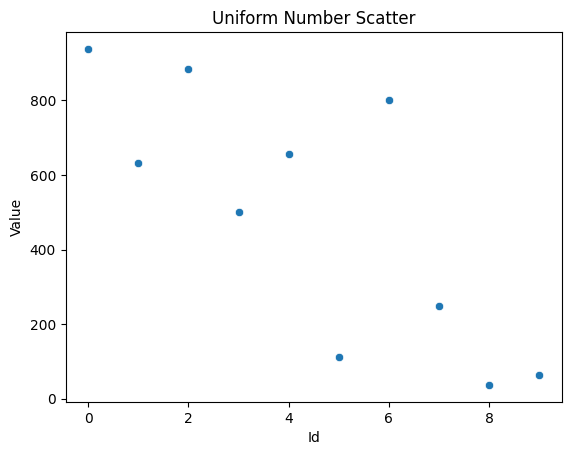

In [ ]:
# Set the seed for reproducibility
np.random.seed(1223)

# Generate 10 random uniformly distributed numbers
x = np.random.randint(low=0, high=1000, size=10)
print(f'x = {x}')

plot_scatter(numbers=x, token='Uniform')

x = [527 431 845 844 761 622 250 265 943  34]


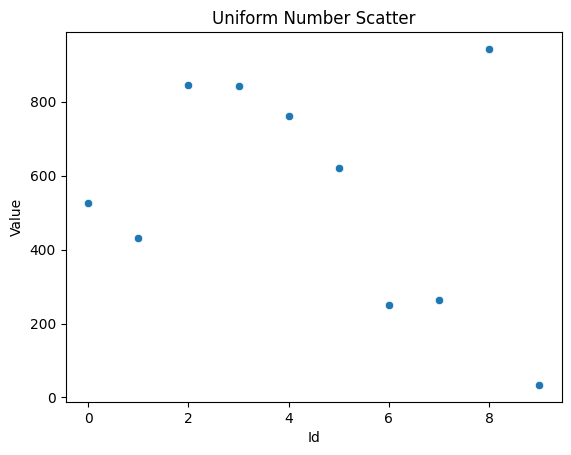

x = [858 265 554 308 162 734 137 734 741  89]


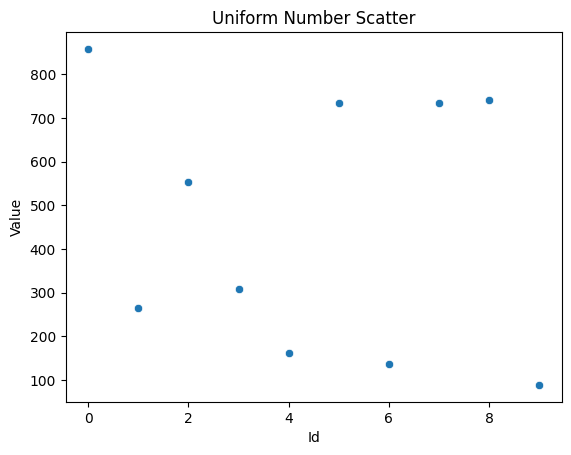

x = [380 208 258 274 261 441 509  10 617 175]


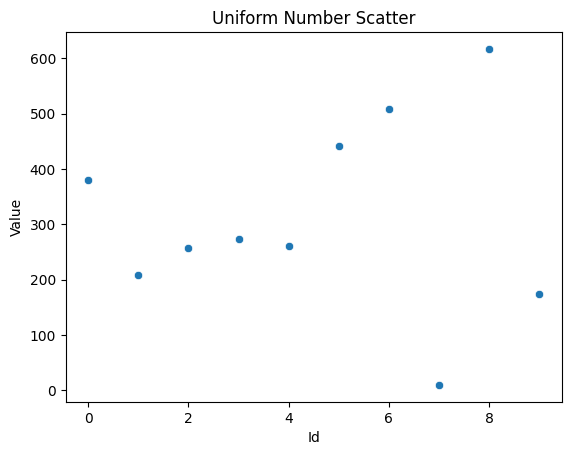

x = [394  58 274 563 819  74 292 354 307 722]


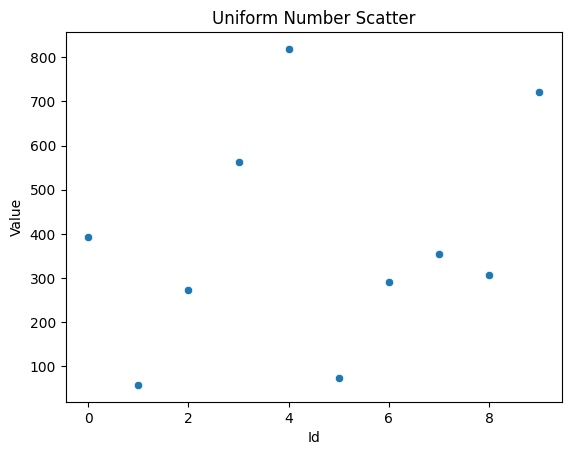

x = [755 838 156 817 192 728  11 518 109 227]


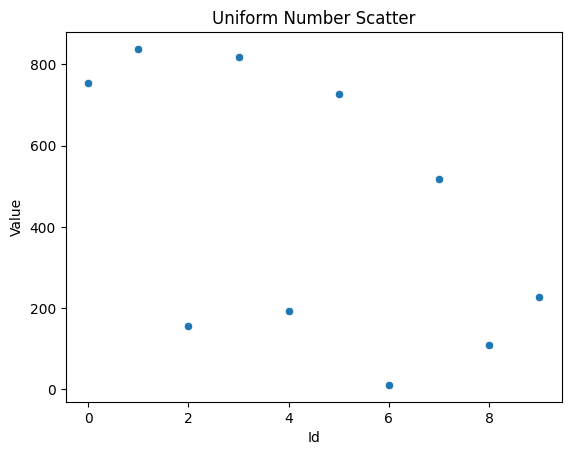

x = [148 535 555 130 953 404 382 275 830  45]


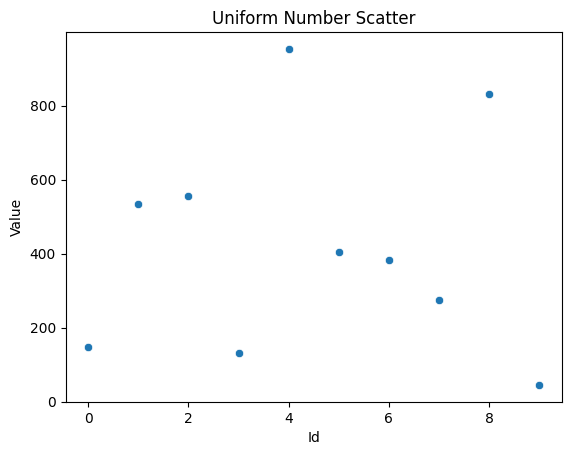

x = [ 83  19 115 862 947 462 837 977 930 224]


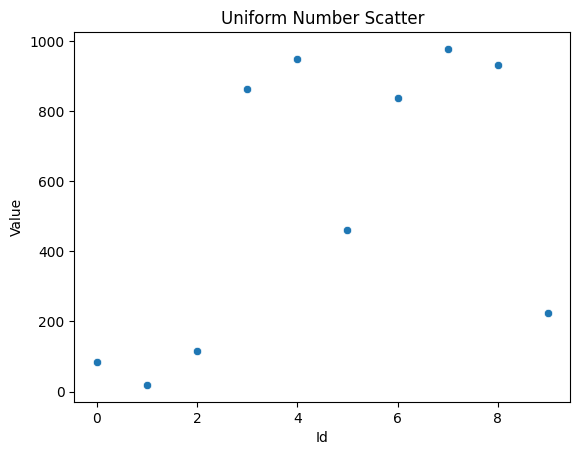

x = [ 82 535 807 256 256 296 771 188 255 762]


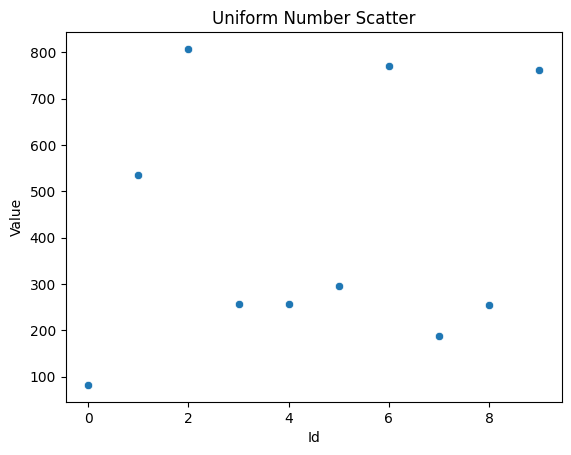

x = [131 450 131 411 973 349 982 543 482 622]


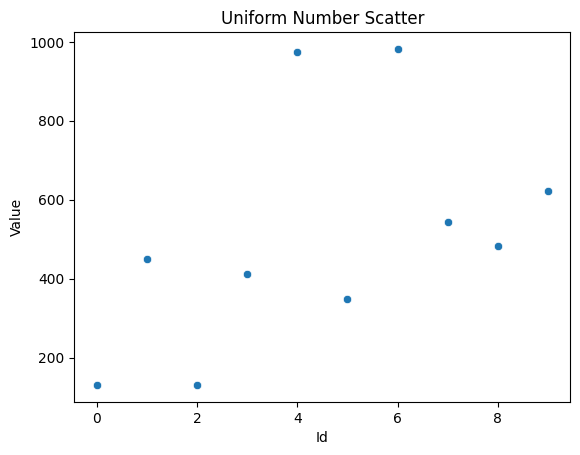

x = [883 222  76 951 105 921  42 491 485 925]


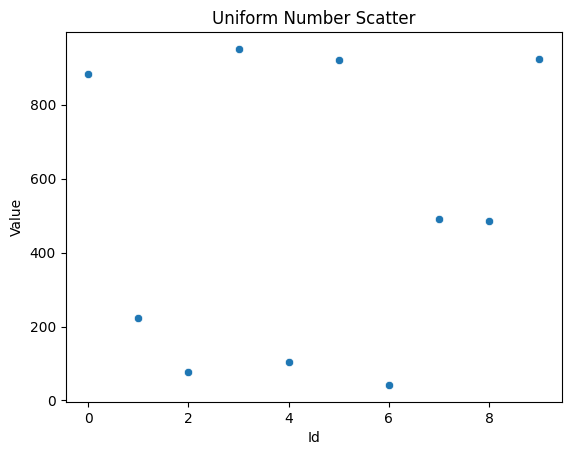

In [ ]:
# Import the time library to slow down code execution
import time

# Set 10 times a different seed
for i in range(0, 10):
  np.random.seed(x[0])

  # Generate 10 random uniformly distributed numbers
  x = np.random.randint(low=0, high=1000, size=10)
  print(f'x = {x}')

  plot_scatter(numbers=x, token='Uniform')
  time.sleep(2)

# Uniform distribution

In [ ]:
# Generate 10000 uniformly distributed random integers
uniform_numbers = np.random.randint(low=0, high=1000, size=10000)
# uniform_numbers

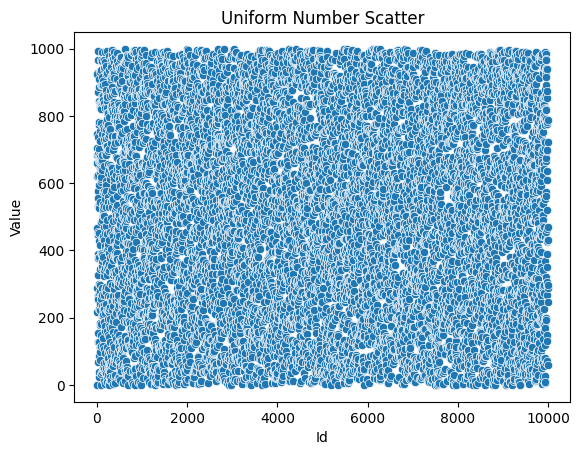

In [ ]:
# Plot the points with seaborn
plot_scatter(uniform_numbers, token='Uniform')

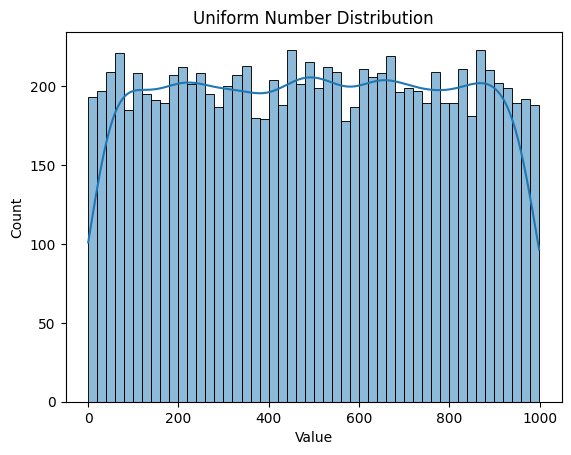

In [ ]:
# Plot the distribution with seaborn
plot_distribution(uniform_numbers, token='Uniform')

In [ ]:
compute_stats(uniform_numbers)

Mean: 498.655
Standard deviation: 287.87800293700803
50%-quantile: 499.0
Median: 499.0
Z-score: [ 1.49141301 -0.73522464 -0.11343347  1.46362346 -1.72870103 -0.98185689
  1.47404455  0.71330563  0.85920076  0.64383176]
Z-score mean: 9.308109838457313e-17


# Analyzing distributions

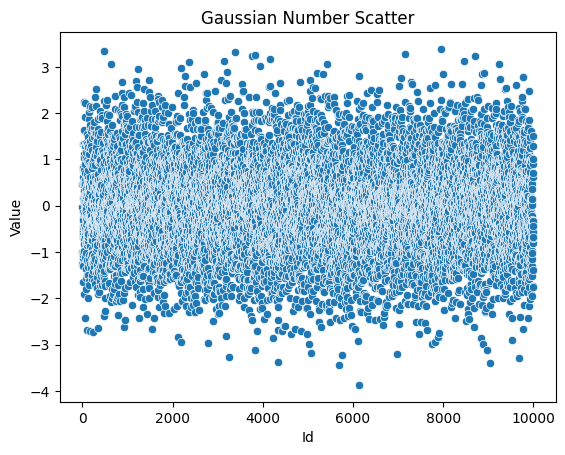

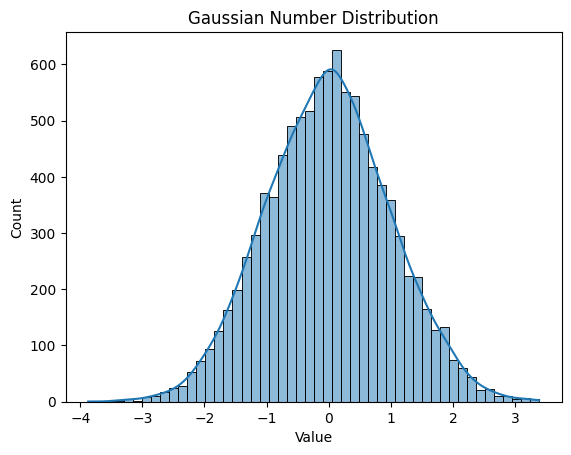

Mean: -0.006924020711497889
Standard deviation: 0.9997362524308935
50%-quantile: -0.001075618244275211
Median: -0.001075618244275211
Z-score: [ 0.4749922  -1.25729876 -0.99131965 -0.01844133  0.50735263 -1.11454226
  0.16430888 -0.26198064  0.6296059   0.77885167]
Z-score mean: -2.6290081223123708e-17


In [ ]:
# Generate 10000 random numbers from a Gaussian distribution
mu, sigma = 0, 1 # mean and standard deviation
gaussian_numbers = np.random.normal(mu, sigma, 10000)

# Fit a probability distribution to the data using seaborn
plot_scatter(gaussian_numbers, token='Gaussian')
plot_distribution(gaussian_numbers, token='Gaussian', kde=True)

# Compute the mean, standard deviation, 50%-quantile, median, and z-score
compute_stats(gaussian_numbers)

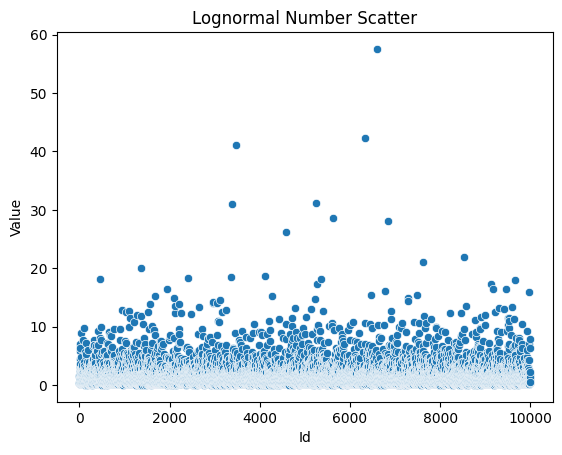

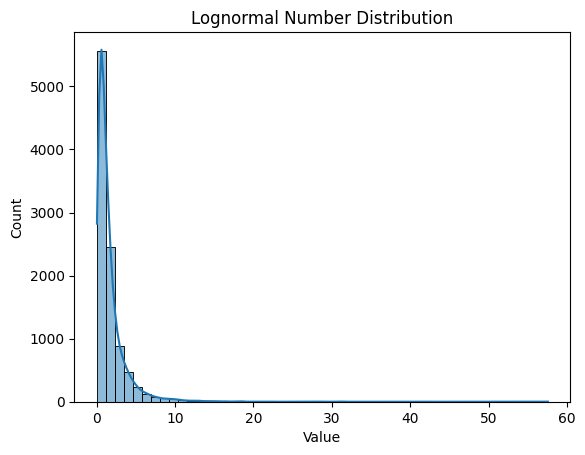

Mean: 1.6563617915186728
Standard deviation: 2.1673925457515284
50%-quantile: 1.020858479007277
Median: 1.020858479007277
Z-score: [-0.01979062 -0.58029962 -0.22775534 -0.29501343 -0.21505457  0.76228312
 -0.28394747  2.49274377 -0.69981722  1.90969963]
Z-score mean: -1.3855583347321953e-17


In [ ]:
# Generate 10000 random numbers from a lognormal distribution
mu, sigma = 0, 1 # mean and standard deviation of the underlying normal distribution
lognormal_numbers = np.random.lognormal(mu, sigma, 10000)

# Fit a probability distribution to the data using seaborn
plot_scatter(lognormal_numbers, token='Lognormal')
plot_distribution(lognormal_numbers, token='Lognormal', kde=True)

# Compute the mean, standard deviation, 50%-quantile, median, and z-score
compute_stats(lognormal_numbers)

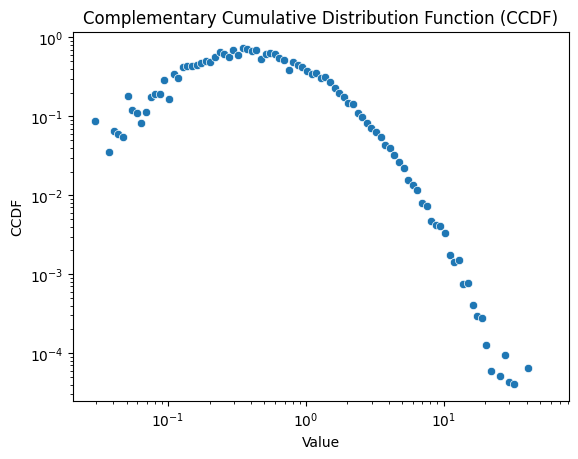

In [ ]:
N = 1000
# plotting the PDF estimated from variates
bin_min, bin_max = np.min(lognormal_numbers), np.max(lognormal_numbers)
bins = 10**(np.linspace(np.log10(bin_min), np.log10(bin_max), 100))
counts, edges = np.histogram(lognormal_numbers, bins, density=True)
centers = (edges[1:] + edges[:-1])/2.

# plotting the expected PDF
xs = np.linspace(bin_min, bin_max, N)

# Plot the CCDF using seaborn
sns.scatterplot(x=centers, y=counts)
sns.set_style('whitegrid')
plt.title('Complementary Cumulative Distribution Function (CCDF)')
plt.xlabel('Value')
plt.ylabel('CCDF')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xscale('log')  # Set the y-axis scale to logarithmic

plt.show()

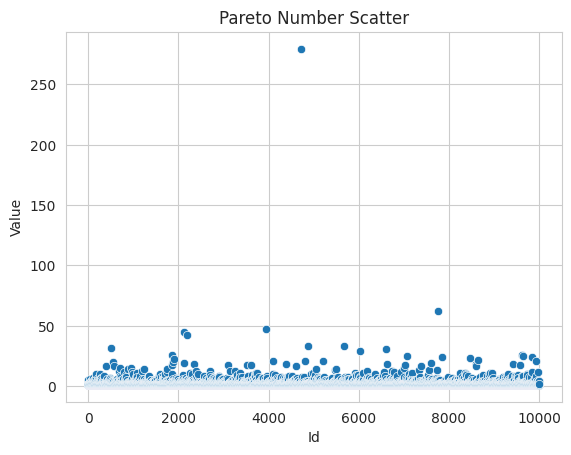

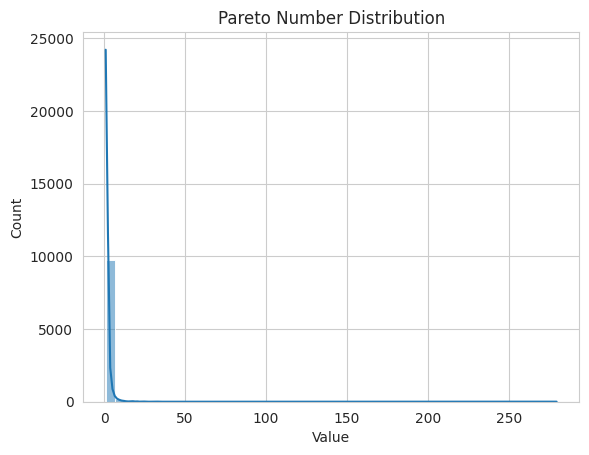

Mean: 1.9896567774941796
Standard deviation: 3.4623504532481175
50%-quantile: 1.4189759582725556
Median: 1.4189759582725556
Z-score: [-0.27590198 -0.06119008 -0.25641869 -0.24639635 -0.26859828  0.80515013
 -0.1195869  -0.26071561 -0.2830799  -0.14522337]
Z-score mean: -1.0835776720341528e-16


In [ ]:
# Generate 10000 random numbers from a pareto distribution
N = 10000
a, xmin = 2.0, 1.0 # shape parameter
power_numbers = np.random.pareto(a, N) + xmin

# Fit a probability distribution to the data using seaborn
plot_scatter(power_numbers, token='Pareto')
plot_distribution(power_numbers, token='Pareto', kde=True)

# Compute the mean, standard deviation, 50%-quantile, median, and z-score
compute_stats(power_numbers)

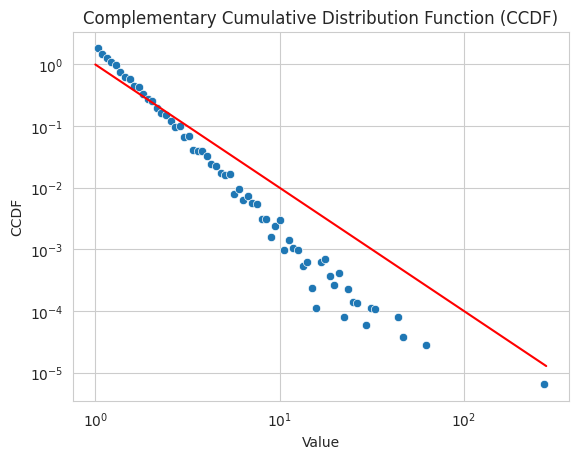

In [ ]:
# plotting the PDF estimated from variates
bin_min, bin_max = np.min(power_numbers), np.max(power_numbers)
bins = 10**(np.linspace(np.log10(bin_min), np.log10(bin_max), 100))
counts, edges = np.histogram(power_numbers, bins, density=True)
centers = (edges[1:] + edges[:-1])/2.

# plotting the expected PDF
xs = np.linspace(bin_min, bin_max, N)

# Plot the CCDF using seaborn
sns.scatterplot(x=centers, y=counts)
sns.set_style('whitegrid')
plt.plot(xs, [(a-1)*xmin**(a-1)*x**(-a) for x in xs], color='red')
plt.title('Complementary Cumulative Distribution Function (CCDF)')
plt.xlabel('Value')
plt.ylabel('CCDF')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xscale('log')  # Set the y-axis scale to logarithmic

plt.show()

In [ ]:
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


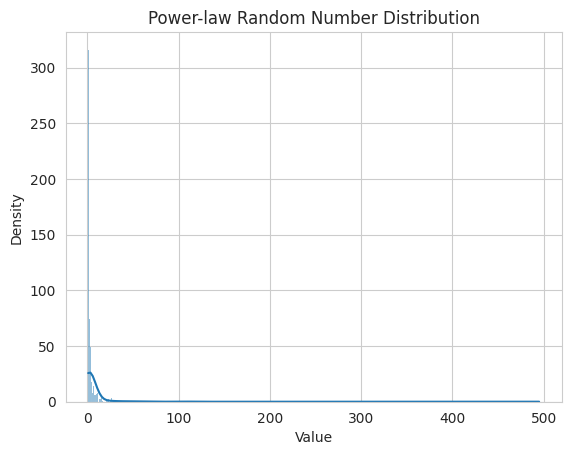

Mean: 6.589713999859127
Standard deviation: 25.016836853326787
50%-quantile: 1.9650161810164857
Median: 1.9650161810164857
Z-score: [ 0.43297871  0.62084423 -0.21059038 -0.21466566 -0.11871399 -0.21317162
 -0.11679748 -0.16856424 -0.22241923 -0.19040475]
Z-score mean: -3.552713678800501e-18


In [ ]:
import powerlaw

# Generate N random numbers from a power-law distribution
N = 1000
a, xmin = 2.0, 1.0
power_numbers = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(N)

# Fit a probability distribution to the data using seaborn
sns.histplot(power_numbers, kde=True)
plt.title('Power-law Random Number Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
# plt.yscale('log')
plt.show()

# Compute the mean, standard deviation, 50%-quantile, median, and z-score
compute_stats(power_numbers)

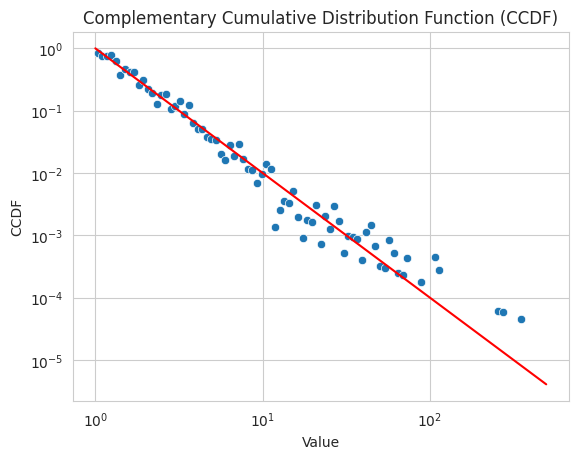

In [ ]:
# plotting the PDF estimated from variates
bin_min, bin_max = np.min(power_numbers), np.max(power_numbers)
bins = 10**(np.linspace(np.log10(bin_min), np.log10(bin_max), 100))
counts, edges = np.histogram(power_numbers, bins, density=True)
centers = (edges[1:] + edges[:-1])/2.

# plotting the expected PDF
xs = np.linspace(bin_min, bin_max, N)

# Plot the CCDF using seaborn
sns.scatterplot(x=centers, y=counts)
sns.set_style('whitegrid')
plt.plot(xs, [(a-1)*xmin**(a-1)*x**(-a) for x in xs], color='red')
plt.title('Complementary Cumulative Distribution Function (CCDF)')
plt.xlabel('Value')
plt.ylabel('CCDF')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xscale('log')  # Set the y-axis scale to logarithmic

plt.show()

# Exploring correlation coefficients

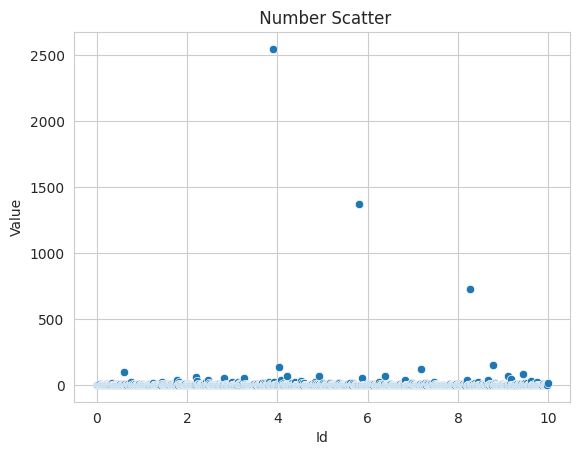

Pearson correlation coefficient: 0.005759172099421839
Spearman rank correlation coefficient: -0.02537472137472138


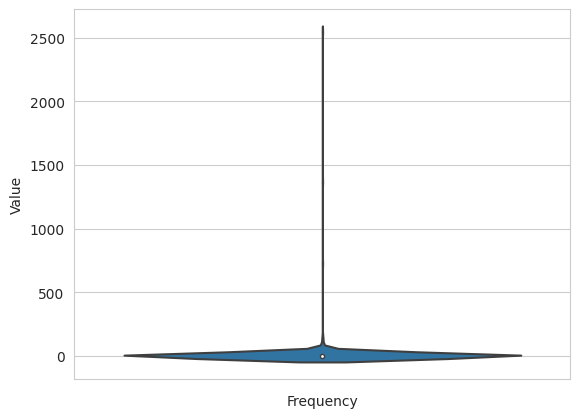

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Set the seed for reproducibility
np.random.seed(124)

N = 1000

# Generate 10 random uniformly distributed numbers
numbers = np.random.uniform(size=N)

# Generate N random numbers from a Gaussian distribution
# mu, sigma = 0, 1 # mean and standard deviation
# numbers = np.random.normal(mu, sigma, N)

# Generate N random numbers from a Lognormal distribution
# mu, sigma = 0, 1 # mean and standard deviation of the underlying normal distribution
# numbers = np.random.lognormal(mu, sigma, N)

# Generate N random numbers from a power-law distribution
a, xmin = 2.0, 1.0
numbers = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(N)

x = np.array(range(0, len(numbers)))/100
y = numbers
# print(f'x = {x}')
# print(f'y = {y}')

plot_scatter(x=x, numbers=y, token='')

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(x, y)
print("Pearson correlation coefficient:", corr)

# Calculate the Spearman rank correlation coefficient
rank_corr, _ = spearmanr(x, y)
print("Spearman rank correlation coefficient:", rank_corr)

# Violin plot
sns.violinplot(y=numbers)
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.show()

Correlation case 2

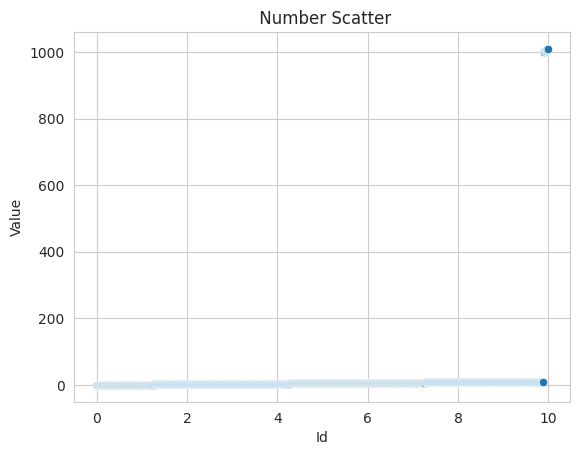

Pearson correlation coefficient: 0.2004208481708609
Spearman rank correlation coefficient: 1.0


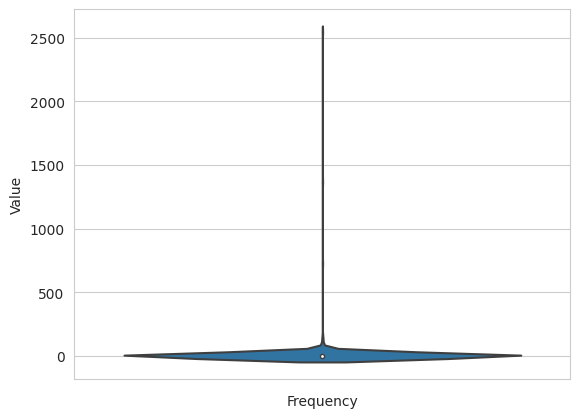

In [ ]:
x = np.array(range(0, len(numbers)))/100
# x = numbers
y = x[:N-10]
y = np.append(y, np.array(range(1000, 1010)))
# print(f'x = {x}')
# print(f'y = {y}')

plot_scatter(x=x, numbers=y, token='')

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(x, y)
print("Pearson correlation coefficient:", corr)

# Calculate the Spearman rank correlation coefficient
rank_corr, _ = spearmanr(x, y)
print("Spearman rank correlation coefficient:", rank_corr)

# Violin plot
sns.violinplot(y=numbers)
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.show()

Correlation case 3

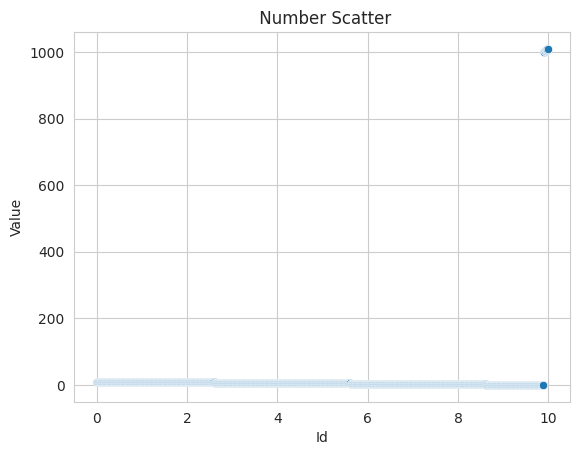

Pearson correlation coefficient: 0.1441134857205174
Spearman rank correlation coefficient: -0.9405979605979605


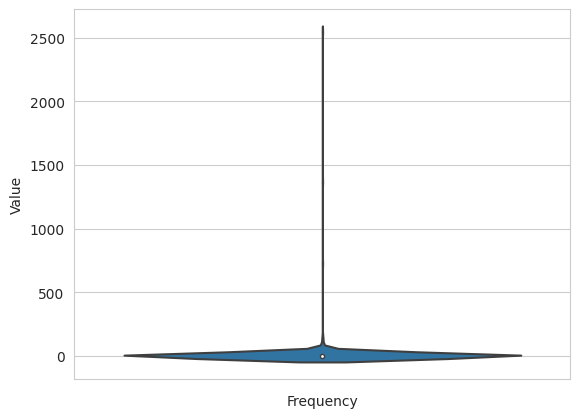

In [ ]:
x = np.array(range(0, len(numbers)))/100
# x = numbers
y = np.array(range(len(numbers), 10, -1))/100
y = np.append(y, np.array(range(1000, 1010)))
# print(f'x = {x}')
# print(f'y = {y}')

plot_scatter(x=x, numbers=y, token='')

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(x, y)
print("Pearson correlation coefficient:", corr)

# Calculate the Spearman rank correlation coefficient
rank_corr, _ = spearmanr(x, y)
print("Spearman rank correlation coefficient:", rank_corr)

# Violin plot
sns.violinplot(y=numbers)
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.show()

# Hypothesis testing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DRIVE_PATH = 'drive/MyDrive/Colab Notebooks/Intro_to_Stats_and_Python/'

Mounted at /content/drive


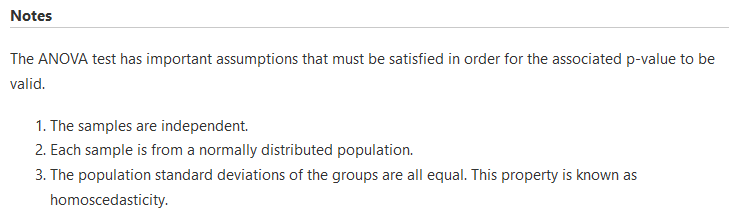

In [ ]:
# Let's practice using ANOVA
# Caution: our data must satisfy some assumptions to use ANOVA
# If the assumptions are not satisfied, we must use a different testing method.
from IPython.display import Image
Image(DRIVE_PATH+'ANOVA_assumptions.png') # Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html (retrieved 2023-05-19)

Code snippets from: https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e by Ece Işık Polat

In [ ]:
import numpy as np
from scipy import stats

def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

def check_variance_homogeneity(*groups):
    test_stat_var, p_value_var= stats.levene(*groups)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [ ]:
rA = np.array([99.15350615198179, 98.74826688188851, 100.15329297533687, 99.61183218901375, 100.10244579862405, 101.2994286563837, 100.59788780443797, 100.38943832259794, 100.90731014359466, 99.9334591044599, 101.22116766111525, 101.22065585775567, 99.97235142670608, 100.8893994369516, 101.30639169564247, 99.87406635687276, 100.08758475354983, 99.82854779770133, 101.76386503283405, 99.770398883159, 99.92568582257535, 100.51537971733867, 99.58057398953707, 99.6644596386889, 101.02933586311592, 99.15885872884641, 99.85832129908893, 100.85524677868179, 100.63053047584864, 99.62916343739025, 99.60320069424944, 100.85068157879955, 100.50641655677555, 99.96108993657992, 99.27343887042106, 99.22649983200645, 99.45982570678589, 99.21314645598456, 100.53699858338571, 100.81249577592274, 100.56403710922152, 99.91496710714488, 98.82013002541848, 99.14447425353251, 99.61840107310968, 100.50563944869953, 101.05453608577238, 101.17562621952321, 101.50914463704031, 100.87339104675989, 99.15779905245213, 98.82524959862684, 100.27990553222584, 100.48314772137377, 101.80474231322937, 100.69820661855368, 99.98202613850091, 100.35482665846362, 99.86522114572855, 101.2528902177828, 100.09881359579984, 101.20290624143166, 99.96206848398518, 100.64551427314446, 100.46811269848017, 101.32107660054213, 100.8677902891797, 99.70962751930192, 100.07835480437456, 98.09032086520818, 100.05707824094115, 98.98583455825062, 99.35239059878468, 99.89509539017993, 100.58798837838884, 100.23185965911563, 100.46248066665216, 97.46261021236676, 100.24142095314969, 102.54808341831776, 99.5753933847955, 99.94177944877404, 101.00444636069133, 102.62275864156084, 100.74616683235318, 99.43481848851332, 100.7532026195051, 101.57411643432637, 99.14390077749135, 98.16543489022773, 100.1518019574753, 102.08815493193215, 99.67673862898371, 98.39361136521096, 99.6272667486455, 100.57233052748106, 99.96569928680562, 100.79643052720887, 99.9661710442162, 99.09080093745173, 99.11038969193025, 100.40464358096268, 98.69590861601422, 101.1812522780368, 99.29954628581964, 99.7050185637931, 100.35054481313568, 100.22649755729606, 101.18841813121784, 101.34295829618303, 97.9033259683779, 99.52812909396928, 101.45708826552382, 102.3629814116394, 100.66235261810577, 100.93426381729938, 100.0308781044011, 99.37185138023824, 99.24545689620946, 98.60616498922927, 101.16387271566762, 100.84341149268074, 100.3721538165616, 100.87429327360817, 99.74870543157846, 98.66818656610624, 101.16119527589333, 100.79004106597377, 98.97151596048928, 99.56453307072636, 99.3308743043995, 100.11425401912602, 99.93807039818873, 101.41850344627821, 99.28005619122315, 101.98970630722428, 100.13489586806443, 99.7921036531665, 101.19478990402418, 100.71126046235321, 102.6056772928236, 101.00799757139951, 100.3815545645193, 98.95743586427936, 100.3663234140352, 100.35293068335837, 101.17838890616711, 99.84296640552577, 102.67915365183673, 99.58374502124235, 101.34116270283569, 98.47121269686487, 99.40363584986422, 98.63844577210105, 99.17980528030796, 99.06490599625742, 99.488093748261, 99.14339865628632, 99.78722075388175, 99.79958275217128, 99.93214659693518, 99.38688995424293, 100.55563606771254, 100.39519860747572, 98.88786975305884, 100.08834368154773, 100.16818915647704, 100.11357328519325, 99.77435976529709, 101.49746645312476, 100.01960462721362, 100.76737839190807, 99.26300311755939, 100.65656670275894, 100.60511208188429, 100.76174668731515, 100.50602378210131, 99.67440411547241, 98.58193387105736, 98.96411071704411, 101.75492501024499, 98.75689155513555, 100.336520996357, 99.83197665075338, 100.99158929990888, 99.60118406089867, 100.96909845109835, 98.41848754384802, 100.79946202328179, 98.7798779385291, 98.64728495902871, 102.08366690486734, 102.09948557084624, 101.07218507744895, 100.70161233635035, 101.35507788301162, 99.36004980816168, 100.58160728527021, 101.06306950049854, 98.66668467480164])

rB = np.array([100.37098674462737, 102.64734999563132, 99.65039384986655, 101.71063876461395, 101.5108382288261, 102.47303249524668, 101.84640940402501, 102.03708173350876, 100.84270040785799, 102.0041935323626, 100.60911370992531, 100.27675015736057, 101.42109138206992, 99.7835917790698, 101.29897357685269, 100.46097256303462, 100.44694054354233, 100.53347505036223, 102.94594027585936, 101.62217260440309, 101.03339809807444, 99.81116505160577, 101.0484141758612, 102.77438946640436, 100.3189485857014, 100.39005048058822, 99.98094209972068, 101.54940999804376, 100.36815606786212, 100.40524405417223, 101.39791038597848, 100.69240967369662, 101.51629359602143, 102.17153520105526, 101.33234393261297, 103.81252645976154, 101.31764446653891, 101.98456706121813, 101.488626457091, 101.16796503387748, 101.65219896855935, 101.01781948652417, 101.17508159229183, 101.74095996151624, 101.36360474829428, 99.65645364461145, 99.43004866652676, 102.5007453517013, 103.15307672491218, 100.98312112432298, 103.78378673236679, 101.31991169249271, 100.71113695647571, 102.0360003917956, 100.78445664132693, 101.64474698571013, 100.76135412489508, 101.31944026893396, 99.31539185881627, 101.84522718569801, 99.31489356570707, 102.91107561570924, 101.76838525024834, 101.70744173754407, 99.78803956731872, 100.41646677076321, 101.17703496676128, 101.55996882438572, 100.15129541905975, 100.88592870397146, 100.02928685430274, 99.76325428591309, 100.08881077570113, 101.54477144672418, 101.41603614550539, 98.8390053679029, 100.94244096953133, 100.80283663542829, 100.64826635688712, 100.57283184026291, 101.61196095007973, 100.43482632467641, 102.11247916882343, 102.18002082802809, 98.59083587146654, 102.54772558448401, 99.60247423866947, 99.739966730594, 101.82294815481768, 99.50546240927487, 101.82941334168007, 98.68781643862994, 101.38533124691108, 104.82855051850593, 101.02138194539239, 101.25490851545071, 101.29338827536952, 101.70882101355852, 100.71081356720634, 99.75103575116037, 99.36716715037234, 101.52013436491987, 101.18964644549352, 100.15159899903706, 101.59906814603718, 100.47221827406864, 102.20915970693154, 99.42226108832472, 101.21797626758591, 102.39616851807266, 99.1724440652037, 100.92762570238608, 100.1202770401745, 101.58852677764388, 99.52354193930213, 103.37405485622587, 101.43841564636521, 102.64878495111296, 99.86536749570344, 101.92560199399114, 102.98959995349392, 101.35359350686072, 103.17355703649787, 101.3576018045846, 100.77007403922336, 101.18878822918192, 101.23171699421341, 100.04701757397511, 101.80963803527597, 101.68906096833575, 101.46298837392503, 100.38642917262737, 102.00844747205242, 99.78580870280594, 100.50544200978999, 99.9919544950394, 99.01150208305742, 100.59199904749723, 100.81950257363536, 101.28271882236656, 100.86486643235504, 100.06084287196121, 100.27740484324582, 100.73172641475226, 102.48023218492827, 102.0067835247527, 102.05882426224156, 100.70867509174296, 100.45807833571628, 98.77510334386369, 101.00943503037614, 101.09953488505445, 100.47781619480236, 101.8343416938332, 102.46901637250022, 103.06802200149357, 101.14675335635394, 101.34923451184204, 99.65150137312247, 100.89139901993347, 101.07924121891321, 100.70396029272823, 101.65224273105743, 100.71710064706406, 100.93170825821477, 102.5730380262834, 99.85183893347691, 101.64046485268743, 102.106293274782, 103.09238732207191, 101.26435647698538, 101.15743385141589, 101.26163234120058, 102.19322442223941, 102.43583071228016, 102.52768011611104, 101.31017966030414, 101.78226023388548, 103.42131343748859, 100.50146607507804, 100.36533421585136, 101.6204726522263, 101.78879210453641, 100.19354248698431, 101.92139337615342, 103.42448472495123, 99.70517338808712, 102.88608634618951, 101.61832404142301, 99.83378891627942, 102.52605224994478, 102.59377064504591, 100.38068653826844, 101.01711930872855, 100.46601368183332, 100.61090015076263, 100.79512092065312, 100.1617727524713, 101.5961709287797, 99.90894617534488])

rAB = np.append(rA, rB)

check_normality(rA)
check_normality(rB)
check_normality(rAB)
check_variance_homogeneity(rA, rB, rAB)

p value:0.7818
Fail to reject null hypothesis >> The data is normally distributed
p value:0.6001
Fail to reject null hypothesis >> The data is normally distributed
p value:0.3543
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0917
Fail to reject null hypothesis >> The variances of the samples are same.


In [ ]:
compute_stats(rB)

Mean: 101.1441102639208
Standard deviation: 1.0801410517098833
50%-quantile: 101.18291159797161
Median: 101.18291159797161
Z-score: [-0.71576163  1.39170688 -1.38289014  0.52449493  0.33951859  1.23032286
  0.65019206  0.82671746 -0.27904676  0.7962694 ]
Z-score mean: -7.627232179174826e-15


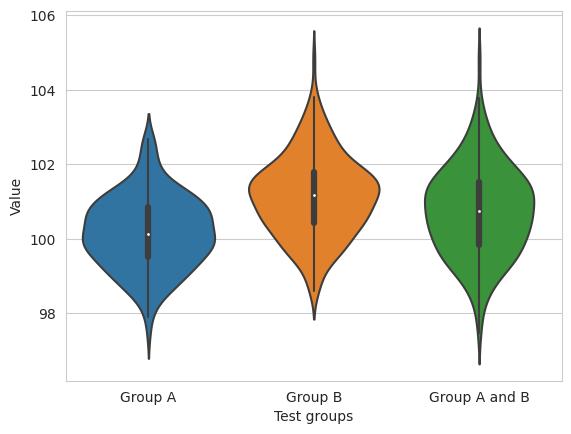

In [ ]:
import pandas as pd
# Combine the arrays into a single DataFrame
data = {'Group A': rA, 'Group B': rB,
        'Group A and B': np.random.choice(rAB, size=len(rB), replace=False)}
df = pd.DataFrame(data)

# Plot the violin plot
sns.violinplot(data=df)
plt.xlabel('Test groups')
plt.ylabel('Value')
plt.show()

In [ ]:
F, p_value = stats.f_oneway(rA, rB, rAB)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000000
Reject null hypothesis
